# **1. Explain the importance of pooling layer**

**1. Reduces the number of training parameters and computation cost, thus control overfitting.
**1. Make model invariant to certain distortion.****

# **2. What is transfer learning**

**Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.**

# **Import Libraries**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/men-women-classification/men/00002129.jpg
/kaggle/input/men-women-classification/men/00001981.jpg
/kaggle/input/men-women-classification/men/00001965.jpg
/kaggle/input/men-women-classification/men/00001915.jpg
/kaggle/input/men-women-classification/men/00000399.jpg
/kaggle/input/men-women-classification/men/00000390.jpg
/kaggle/input/men-women-classification/men/07 (4).jpg
/kaggle/input/men-women-classification/men/00000797.jpg
/kaggle/input/men-women-classification/men/00001179.jpg
/kaggle/input/men-women-classification/men/00000030.jpg
/kaggle/input/men-women-classification/men/00000848.jpg
/kaggle/input/men-women-classification/men/00000042.jpg
/kaggle/input/men-women-classification/men/00000127.jpg
/kaggle/input/men-women-classification/men/00000113.jpg
/kaggle/input/men-women-classification/men/00002266.jpg
/kaggle/input/men-women-classification/men/00001267.jpeg
/kaggle/input/men-women-classification/men/00001144.jpg
/kaggle/input/men-women-classification/men/000011

In [18]:
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

In [3]:
print(os.listdir("../input"))

['men-women-classification']


In [4]:
data=[]
labels=[]
men=os.listdir("../input/men-women-classification/men/")
print(men)
for a in men:
    try:
        image=cv2.imread("../input/men-women-classification/men/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((200, 200))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")
women=os.listdir("../input/men-women-classification/women/")
for b in women:
    try:
        image=cv2.imread("../input/men-women-classification/women/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((200, 200))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")


['00002129.jpg', '00001981.jpg', '00001965.jpg', '00001915.jpg', '00000399.jpg', '00000390.jpg', '07 (4).jpg', '00000797.jpg', '00001179.jpg', '00000030.jpg', '00000848.jpg', '00000042.jpg', '00000127.jpg', '00000113.jpg', '00002266.jpg', '00001267.jpeg', '00001144.jpg', '00001120.jpg', '00000862.jpg', '00002069.jpg', '00001807.png', '00000930.png', '00000335.jpg', '00000832.gif', '00000459.jpg', '00000115.jpg', '00001161.jpg', '00000382.jpg', '00002274.jpg', '00000095.jpg', 'misclassed (12).jpg', '00000233.jpg', '00000959.png', '00001784.jpg', '00000493.jpg', '00001004.jpg', '00001640.jpg', '00001035.jpg', '00001488.jpg', '00000089.jpg', '00001682.jpg', '00001625.jpg', '00002187.png', '00000437.jpg', '00001007.JPG', '00000987.jpg', '00001962.jpg', '00000760.jpg', '00001067.jpg', '00000048.jpg', '00001159.jpg', '00002220.jpg', '00002199.jpg', '00002120.jpg', '00000336.jpg', '00001795.jpg', '00000387.jpg', '07 (1).PNG', '00002010.jpg', '00002041.jpg', '00002244.jpg', '00002234.jpg', '00

Corrupt JPEG data: 6 extraneous bytes before marker 0xed


Corrupt JPEG data: 6 extraneous bytes before marker 0xed


Corrupt JPEG data: 5 extraneous bytes before marker 0xee


# **Data preprocessing**

**Create a data and labels list with each image's RGB values as the data. I'll be taking classes 0 and 1 for two classes.**

In [5]:
Cells=np.array(data)
labels=np.array(labels)
print(Cells.shape)
print(labels.shape)

(3311, 200, 200, 3)
(3311,)


In [6]:
np.save("Cells",Cells)
np.save("labels",labels)

In [7]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [8]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [9]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [10]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # Normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [11]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]
print(y_train)
print(y_test)
print(x_train.shape)
print(y_train.shape)

[1 1 1 ... 0 0 1]
[1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0]
(2980, 200, 200, 3)
(2980,)


# **One hot encoding**

In [12]:
y_train=keras.utils.to_categorical(y_train,2)
y_test=keras.utils.to_categorical(y_test,2)

# **Create Model**

In [13]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

2023-01-11 12:46:36.639310: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0

In [14]:
# Using the Adam optimizer and compile the model with loss as categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=128,epochs=20)

2023-01-11 12:46:38.483317: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
24/24 [==============================] - 22s 852ms/step - loss: 1.2511 - accuracy: 0.5446
Epoch 2/20
24/24 [==============================] - 20s 817ms/step - loss: 0.6750 - accuracy: 0.5742
Epoch 3/20
24/24 [==============================] - 21s 865ms/step - loss: 0.6577 - accuracy: 0.6094
Epoch 4/20
24/24 [==============================] - 20s 846ms/step - loss: 0.6227 - accuracy: 0.6587
Epoch 5/20
24/24 [==============================] - 20s 823ms/step - loss: 0.5969 - accuracy: 0.6768
Epoch 6/20
24/24 [==============================] - 20s 841ms/step - loss: 0.5592 - accuracy: 0.7299
Epoch 7/20
24/24 [==============================] - 20s 811ms/step - loss: 0.5190 - accuracy: 0.7466
Epoch 8/20
24/24 [==============================] - 20s 835ms/step - loss: 0.4644 - accuracy: 0.7789
Epoch 9/20
24/24 [==============================] - 20s 840ms/step - loss: 0.4003 - accuracy: 0.8144
Epoch 10/20
24/24 [==============================] - 20s 829ms/step - loss: 0.3428 - accura

In [17]:
# Save the model:
model.save('men_women.h5')

In [20]:
#Accuracy on Test data:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

11/11 [==============================] - 1s 93ms/step - loss: 1.2260 - accuracy: 0.6979

 Test_Accuracy:- 0.6978852152824402


In [30]:
# Function convert to array
def convert_to_array(img):
    im = cv2.imread(img)
    cv_rgb =cv2.cvtColor(im,cv2.COLOR_BGR2RGB)   # convert All Image to RGB
    plt.imshow(cv_rgb)
    plt.show()
    img_ = Image.fromarray(im, 'RGB')
    image = img_.resize((200, 200))   # Resize Images 200*200
    
    return np.array(image)

def get_cell_name(label):
    if label==0:
        return "men"
    if label==1:
        return "women"


In [31]:
# Function To Predict
def predict_cell(file):
    model = load_model('men_women.h5')
    print("Predicting: ")
    ar=convert_to_array(file)
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    Cell=get_cell_name(label_index)
    return Cell+" Accuracy =    "+str(acc)

Predicting: 


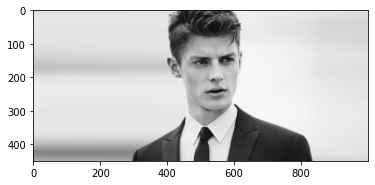

1/1 [==============================] - 0s 116ms/step
[[9.999989e-01 1.103366e-06]]
0


'men Accuracy =    0.9999989'

In [32]:
predict_cell('../input/men-women-classification/men/00000010.jpg')

Predicting: 


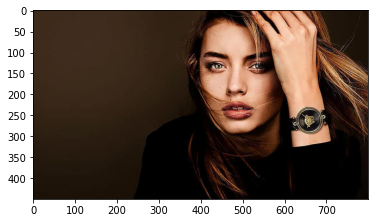

1/1 [==============================] - 0s 112ms/step
[[0.00627153 0.9937285 ]]
1


'women Accuracy =    0.9937285'

In [33]:
predict_cell('../input/men-women-classification/women/00000010.jpg')